In [3]:
### datajohn

import glob
import pandas as pd
import numpy as np

## path  = '/Users/rubythurs/Documents/pilot data/'
path  =  'C:/Users/ZHT/Documents/dataProcess/Pon_behaviorC/' # "C:/Users/ZHT/Documents/pilot data/"
json_files =  glob.glob(path + '*.json')

combined_data =[]
subject = ['A','B','C','D','E','F','G','H','I']
for i, json_file in enumerate(json_files): 
    with open(json_file, 'r') as file:
        json_data = pd.read_json(json_file)
        json_data['subject'] = subject[i]
        print(subject[i])
        combined_data.append(json_data)
        print(combined_data[i].shape)
        print(json_file)
        
print('\n','(trials, measures)')
print('number of files in "pilot data" folder: ', len(combined_data))
data = pd.concat(combined_data,ignore_index=True)
print('\n','total trials:',data.shape) 
columns = data.columns
data.loc[data['vel_y']==-4,'session'] =4
data.loc[data['vel_y']==2,'session'] = 3
#data = data.sort_values(by=['subject']).reset_index(drop=True)
data['touchTimefromPause'] = data['touchTimefromInit'] - data['ratio']
data['ratio'] = data['ratio'].round(2)
data

A
(903, 18)
C:/Users/ZHT/Documents/dataProcess/Pon_behaviorC\HY-08-25-16-50-58-2024.json
B
(833, 18)
C:/Users/ZHT/Documents/dataProcess/Pon_behaviorC\Jia-08-26-10-00-55-2024.json
C
(915, 18)
C:/Users/ZHT/Documents/dataProcess/Pon_behaviorC\Lin-08-25-13-26-42-2024.json
D
(933, 18)
C:/Users/ZHT/Documents/dataProcess/Pon_behaviorC\Xiaochun-08-26-17-22-46-2024.json
E
(902, 18)
C:/Users/ZHT/Documents/dataProcess/Pon_behaviorC\Ziyi-08-26-18-29-35-2024.json

 (trials, measures)
number of files in "pilot data" folder:  5

 total trials: (4486, 18)


,trial,session,choice,isCorrect,touchTimefromInit,touchTimefromPause,correctRate,initTime,pauseTime,ratio,vel_x,vel_y,camID,camShelfRadius,camNeck,targetsDistance,isParallelToViewCanvas,subject
0,1,3,a,False,0.699696,0.599696,0.000000,32.891140,33.564682,0.10,5,2,1,8,0.0,1.10,False,A
1,2,3,l,True,0.671761,0.321761,0.000000,34.423294,35.069600,0.35,5,2,3,8,0.0,1.30,False,A
2,3,3,a,True,1.022736,0.822736,0.500000,35.922337,36.919710,0.20,5,2,1,8,3.5,1.30,False,A
3,4,3,a,True,0.799271,0.299271,0.666667,37.778423,38.551360,0.50,5,2,1,8,2.0,1.15,False,A
4,5,3,a,False,1.239712,0.889712,0.750000,39.409348,40.623390,0.35,5,2,1,8,2.0,1.10,False,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4481,898,4,a,False,0.736572,0.386572,0.694537,1851.176880,1851.883670,0.35,5,-4,1,8,3.5,1.30,False,E
4482,899,4,l,True,1.214966,1.114966,0.693764,1852.746460,1853.932250,0.10,5,-4,1,8,3.5,1.30,False,E
4483,900,4,l,True,0.601196,0.001196,0.694105,1854.810550,0.000000,0.60,5,-4,2,8,2.0,1.10,False,E
4484,901,4,l,True,0.626465,0.476465,0.694444,1856.241700,1856.837280,0.15,5,-4,3,8,3.5,1.10,False,E


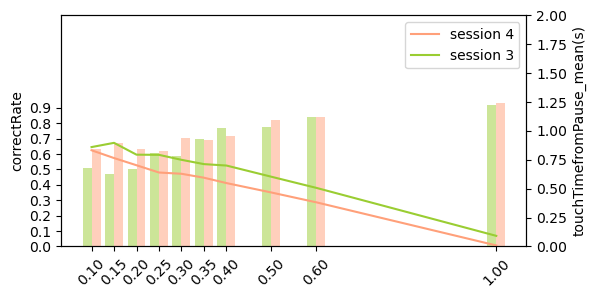

In [8]:

col0 = ['ratio','session']
col1 = ['isCorrect', 'touchTimefromInit',
       'touchTimefromPause']
datagrouped = data.drop(columns=[col for col in data.columns if col not in col0 and col not in col1])
dataGroupByRatio1 = datagrouped.groupby(col0).agg({'isCorrect':['mean']}).unstack(level=-1)
dataGroupByRatio2 = datagrouped.groupby(col0).agg({'touchTimefromPause':['mean']}).unstack(level=-1)
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax = plt.subplots(figsize=(6,3))
plt.xticks(rotation=45,ticks= dataGroupByRatio1.index)
width = 0.02
ax.set_ylim(0,1.5)
ax2 = ax.twinx()
ax2.set_ylim(0,2)
ax2.set_ylabel('touchTimefromPause_mean(s)')
ax.set_ylabel('correctRate')
ax.set_yticks(np.arange(0, 1, 0.1))
line1, = ax2.plot(dataGroupByRatio2.index, dataGroupByRatio2.loc[:,('touchTimefromPause','mean',4)].values,color='lightsalmon')
line2,= ax2.plot(dataGroupByRatio2.index, dataGroupByRatio2.loc[:,('touchTimefromPause','mean',3)].values,color='yellowgreen')
ax.bar(dataGroupByRatio1.index-width/2, dataGroupByRatio1.loc[:,('isCorrect','mean',3)].values,
       width=width,align='center',
       color='yellowgreen',alpha=0.5)
ax.bar(dataGroupByRatio1.index, 
       dataGroupByRatio1.loc[:,('isCorrect','mean',4)].values,
       width=width,
       align='edge',
       color='lightsalmon',
       alpha=0.5)
ax2.legend(handles=[line1,line2],labels=['session 4','session 3'])

<Axes: xlabel='ratio', ylabel='touchTimefromPause'>

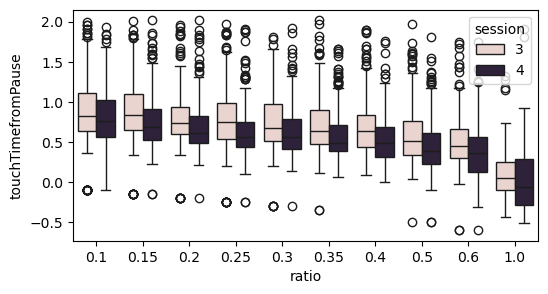

In [9]:
fig,ax = plt.subplots(figsize=(6,3))
sns.boxplot(data=datagrouped,
            x='ratio', y='touchTimefromPause', hue='session',ax=ax)


In [10]:

col2 = ['camID', 'camShelfRadius', 'camNeck',
       'targetsDistance']


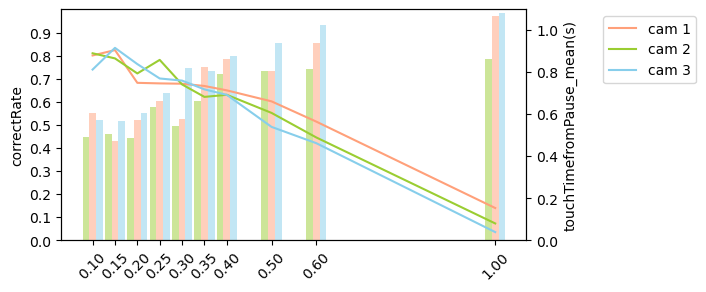

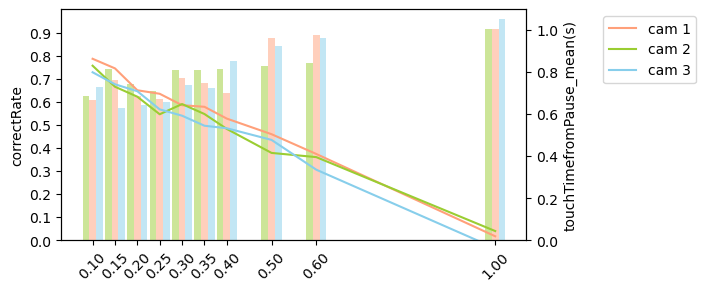

In [11]:
col3 = ['ratio', 'camID']
col1 = ['isCorrect', 'touchTimefromInit',
       'touchTimefromPause']
dataS3 = data.loc[data['session']==3]
dataS4 = data.loc[data['session']==4]
dataS = [dataS3,dataS4]
for i in range(0,2):
    dataS3gr = dataS[i].drop(columns=[col for col in dataS[i].columns if col not in col3 and col not in col1])
    dataS3GroupByRatio1 = dataS3gr.groupby(col3).agg({'isCorrect':['mean']}).unstack(level=-1)
    dataS3GroupByRatio2 = dataS3gr.groupby(col3).agg({'touchTimefromPause':['mean']}).unstack(level=-1)

    fig,ax = plt.subplots(figsize=(6,3))
    plt.xticks(rotation=45,ticks= dataS3GroupByRatio1.index)
    width = 0.015
    ax.set_ylim(0,1.)
    ax2 = ax.twinx()
    ax2.set_ylim(0,1.1)
    ax2.set_ylabel('touchTimefromPause_mean(s)')
    ax.set_ylabel('correctRate')
    ax.set_yticks(np.arange(0, 1, 0.1))
    line1, = ax2.plot(dataS3GroupByRatio2.index, dataS3GroupByRatio2.loc[:,('touchTimefromPause','mean',1)].values,color='lightsalmon')
    line2,= ax2.plot(dataS3GroupByRatio2.index, dataS3GroupByRatio2.loc[:,('touchTimefromPause','mean',2)].values,color='yellowgreen')
    line3, = ax2.plot(dataS3GroupByRatio2.index, dataS3GroupByRatio2.loc[:,('touchTimefromPause','mean',3)].values,color='skyblue')
    ax.bar(dataS3GroupByRatio1.index-width, dataS3GroupByRatio1.loc[:,('isCorrect','mean',1)].values,
        width=width,align='center',
        color='yellowgreen',alpha=0.5)
    ax.bar(dataS3GroupByRatio1.index, 
        dataS3GroupByRatio1.loc[:,('isCorrect','mean',2)].values,
        width=width,
        align='center',
        color='lightsalmon',
        alpha=0.5)
    ax.bar(dataS3GroupByRatio1.index+width/2, 
        dataS3GroupByRatio1.loc[:,('isCorrect','mean',3)].values,
        width=width,
        align='edge',
        color='skyblue',
        alpha=0.5)
    ax2.legend(handles=[line1,line2,line3],labels=['cam 1','cam 2','cam 3'],loc='upper left',bbox_to_anchor=(1.15, 1))

In [12]:
import numpy as np
from scipy.stats import ttest_ind
dataS3 = data.loc[data['session']==3]
dataS4 = data.loc[data['session']==4]
group1 = dataS3.drop(columns=[col for col in dataS4.columns if col not in col3 and col not in col1]).groupby(col3).agg({'touchTimefromPause':['mean']}).unstack(level=-1).loc[:,('touchTimefromPause','mean',1)].values
group2 = dataS4.drop(columns=[col for col in dataS4.columns if col not in col3 and col not in col1]).groupby(col3).agg({'touchTimefromPause':['mean']}).unstack(level=-1).loc[:,('touchTimefromPause','mean',1)].values
t_stat, p_val = ttest_ind(group1, group2)
print(group2,'\n',group1)
# Print the results
print("T-statistic:", t_stat)
print("P-value:", p_val)

[0.86511393 0.81943046 0.71515426 0.69846398 0.64406253 0.63646461
 0.58024028 0.50601238 0.41185002 0.01997655] 
 [0.88090749 0.90649904 0.7505889  0.74792422 0.74633988 0.73560211
 0.71477402 0.66235473 0.56595865 0.15451752]
T-statistic: 0.9562247405258669
P-value: 0.35162617710256316


In [26]:
group1 = dataS3
group1 = group1.loc[(group1['camID'] == 1)&(group1['ratio']==0.10)]
group2 = dataS4
group2 = group2.loc[(group2['camID'] == 1)&(group2['ratio']==0.10)]
t_stat, p_val = ttest_ind(group1['touchTimefromPause'], group2['touchTimefromPause'])

print("T-statistic:", t_stat)
print("P-value:", p_val)


T-statistic: 0.22222934572901162
P-value: 0.8244317180682996


In [29]:

group1 = dataS3.loc[(dataS3['camID'] == 1)&(dataS3['ratio']==0.10)]
group2 = dataS3.loc[(dataS3['camID'] == 2)&(dataS3['ratio']==0.10)]
t_stat, p_val = ttest_ind(group1['touchTimefromPause'], group2['touchTimefromPause'])

print(group1['touchTimefromPause'], group2['touchTimefromPause'])
print("T-statistic:", t_stat)
print("P-value:", p_val)


0       0.599696
7       0.800028
43      0.932036
70      1.639777
133     0.839178
          ...   
3953    0.525061
3972    0.739661
3984    0.475073
3997    0.959265
4003    0.594763
Name: touchTimefromPause, Length: 80, dtype: float64 50      1.157111
65      0.828253
91      0.691550
109     0.721793
120     0.790396
          ...   
3859    0.607459
3871    0.526038
3906    0.468970
3912    0.356848
4027    0.729468
Name: touchTimefromPause, Length: 76, dtype: float64
T-statistic: -0.14724818723899633
P-value: 0.8831287270622856


In [ ]:
##
import math
ratiocol =  [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.6]
discol = [1.1, 1.15, 1.2, 1.3, 1.7]
neckcol = [3.5, 2.0, 0.0]
if (data.loc[0,'trial']>1):
    newrows = pd.DataFrame(columns=columns)
    newrows['trial']=[1]
    newrows['session'] = [3]
    newrows['camNeck'] = [neckcol[0]]
    newrows['targetsDistance'] = [discol[0]]
    newrows['ratio'] = [ratiocol[0]]
    newrows['choice'] = ['abort']
    newrows['camID'] = [data.loc[0,'camID']]
    data = pd.concat([data,newrows])
    data = data.sort_values(by=['trial']).reset_index(drop=True)
for i in range(1,data.shape[0]):
    if math.isnan(data.loc[i,'ratio']):
        if(i==405):
            data.loc[i,'session'] = 4
            data.loc[i,'camNeck'] = neckcol[0]
            data.loc[i,'targetsDistance'] = discol[0]
            for r in range(0,len(ratiocol)):
                if not math.isnan(data.loc[i+r,'ratio']):data.loc[i,'camID'] =  data.loc[i+r,'camID']

        for j in range(0,len(ratiocol)):
            if ratiocol[j] ==data.loc[i-1,'ratio'].round(2):
                if j < len(ratiocol)-1:
                    data.loc[i,'ratio'] = ratiocol[j+1]
                    data.loc[i,'camID'] = data.loc[i-1,'camID']
                    data.loc[i,'camNeck'] = data.loc[i-1,'camNeck']
                    data.loc[i,'targetsDistance'] = data.loc[i-1,'targetsDistance']
                if j == len(ratiocol)-1:
                    data.loc[i,'ratio'] = ratiocol[0] 
                    if data.loc[i-1,'targetsDistance'] < data.loc[i+1,'targetsDistance']:
                        data.loc[i,'targetsDistance'] = data.loc[i+1,'targetsDistance']
                        data.loc[i,'camNeck'] = data.loc[i-1,'camNeck']
                        data.loc[i,'camID'] = data.loc[i-1,'camID'] 
                    if data.loc[i-1,'targetsDistance'] > data.loc[i+1,'targetsDistance']:
                        data.loc[i,'targetsDistance'] = discol[0]
                        data.loc[i,'camID'] = data.loc[i+1,'camID']
                        if data.loc[i-1,'camNeck'] > data.loc[i+1,'camNeck']:
                            data.loc[i,'camNeck'] = data.loc[i+1,'camNeck']
                        if data.loc[i-1,'camNeck'] < data.loc[i+1,'camNeck']:
                            data.loc[i,'camNeck'] = neckcol[0]
                #print(i,data.loc[i,['camID','camNeck','targetsDistance']])
                        
        if(data.loc[i,'trial']<=405):
            data.loc[i,'session'] = 3
        else:
            data.loc[i,'session'] = 4
##


for i in range(1,data.shape[0]):
    index = int(data.loc[i,'trial'])
    if(index-1!=data.loc[i-1,'trial']):
        print(i)
        index0 = int(data.loc[i-1,'trial'])
        blanktrials = list(range(int(data.loc[i-1,'trial'])+1,index))
        print(blanktrials)
        newRows = pd.DataFrame(columns=columns)
        newRows['trial'] = blanktrials
        data = pd.concat([data,newRows],ignore_index=True)
data['choice']=data['choice'].fillna('abort')


In [ ]:
## parameter space

import numpy as np

title_ = data.columns[[0,2,3,4,5,6,7]].to_list() #to be excluded
title = data.columns.to_list()
control = [x for x in title if x not in title_]
print(control,'\n')

for i in control:
    print(i,': ',np.sort(data[i].unique()))
        
##
for i in range(1,data.shape[0]):
    if math.isnan(data.loc[i,'camID']):
        print(i)
        a = data.loc[i,'camID']
        print(a)
##

In [ ]:
group = data.groupby(['camID','camNeck','targetsDistance','session'])
group.size().reset_index(name='counts')

for i,item in group:
    print(i)
    item = print(item)
item

In [ ]:
group = data.groupby(['camID','camNeck','targetsDistance','session'])
hata = group.size().reset_index(name='counts')

abortFreqs = []
abortCounts = []
fisrtNoAbort =[]
lastAbort =[]
import math 

for i,item in group:
   
        abortCount = len(item[item['choice']=="abort"])
        abortFreq =  abortCount/ len(item)
        abortFreqs.append(abortFreq)
        abortCounts.append(abortCount)

        idx = item[(item["choice"]=="a" )|(item["choice"]=="l")].index.min()
        if not math.isnan(idx):
            ratio = item.loc[idx,'ratio']
            fisrtNoAbort.append(ratio)
        if math.isnan(idx):
            fisrtNoAbort.append(100)

        idx = item[item["choice"]=="abort"].index.max()
        if not math.isnan(idx):
            ratio= item.loc[idx,'ratio']
        else: ratio = 0
        lastAbort.append(ratio)

hata['abortFreq'] = abortFreqs
hata['abortCount'] = abortCounts
hata['firstNoAbort'] = fisrtNoAbort
hata['lastAbort'] = lastAbort



import matplotlib.pyplot as plt
import seaborn as sns
figh,axsh = plt.subplots(2*len(hata['camID'].unique()),len(hata['camNeck'].unique()), figsize=(15, 10))
for i, Id  in enumerate(hata['camID'].unique()):
    for j,neck in enumerate(hata['camNeck'].unique()): 
        hata_toplt = hata.loc[(hata['camID']==Id) & (hata['camNeck']==neck)
                & (hata['session']==3)
                ]
        axsh[i,j].plot(hata_toplt['targetsDistance'],hata_toplt['abortFreq'],color = 'green',label = 'session 3')
        axsh[i+len(hata['camID'].unique()),j].plot(hata_toplt['targetsDistance'],hata_toplt['firstNoAbort'],color = 'green',label = 'session 3', linestyle = 'dashed')

        hata_toplt = hata.loc[(hata['camID']==Id) & (hata['camNeck']==neck)
                & (hata['session']==4)
                ]
        axsh[i,j].plot(hata_toplt['targetsDistance'],hata_toplt['firstNoAbort'],color = 'blue',label = 'session 4')
        axsh[i+len(hata['camID'].unique()),j].plot(hata_toplt['targetsDistance'],hata_toplt['lastAbort'],color = 'blue',label = 'session 4', linestyle = 'dashed')

        axsh[i,j].set_ylim(0., 1.1)
        axsh[i,j].legend()
        axsh[i,j].set_title('camID: '+str(Id)+'\n'+'neck: '+str(neck))
        axsh[i+len(hata['camID'].unique()),j].set_ylim(0., 1.)
        axsh[i+len(hata['camID'].unique()),j].legend()
        axsh[i+len(hata['camID'].unique()),j].set_title('camID: '+str(Id)+'\n'+'neck: '+str(neck))
#figh.suptitle('solid-abortratio,\n dashed-firstnoabort ')
figh.suptitle('solid-firstnoabort,\n dashed-lastabort ')
plt.savefig('abort_.png')
        


In [ ]:
hata

In [ ]:
group = data[data['session']==3].groupby(['camID','camNeck','targetsDistance'])
hata = group.size().reset_index(name='counts')

for i,item in group:
    choice = item['choice']
    print(i)
    print(choice.tolist())
    print(item['isCorrect'].tolist())

In [ ]:
## make groups for future analysis called 'grouped_data'
grouped = data.drop(columns=['trial','initTime']).groupby(control)
grouped_data = pd.merge(grouped.mean().reset_index(),grouped.size().reset_index(name='counts'))
grouped_data.rename(columns={'touchTime':'mean_touchTime','isCorrect':'correctRate'},inplace=True)
print('max counts: '+str(grouped_data['counts'].max()))
gata = grouped_data.loc[(grouped_data['counts'] >= 2) & 
                    (grouped_data['camShelfRadius'] ==5.5) & 
                    (grouped_data['isParallelToViewCanvas'] == True)
                    ] #控制变量


import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette("ch:s=.25,rot=-.25", 5)
linestyle = ['solid','dashed','dotted']
colort=sns.color_palette("flare",5)


##### average vel 
gataa = gata.groupby(['targetsDistance','camID','camNeck','ratio']).mean().reset_index()
camid=gataa['camID'].unique()
camneck = gataa['camNeck'].unique()
listofratio=gataa['ratio'].unique() 
figa,axsa = plt.subplots(2,3, figsize=(25, 10))

for a,ao in enumerate(listofratio):
    gataa_axs= gataa.loc[gataa['ratio']==ao]
    for n, neck in enumerate(camneck):
        for i,id in enumerate(camid): 
            gataa_toplt=gataa_axs.loc[(gataa_axs['camID']==id) &
                    (gataa_axs['camNeck']==neck)]
            axsa[0,a].plot(gataa_toplt['targetsDistance'],gataa_toplt['correctRate'],label=f"neck:{neck}+camid:{id}",color = color[n],linestyle = linestyle[i])
            axsa[0,a].set_ylim(0.25, 1.2)
            axsa[0,a].axhline(y=0.5, color='red',linestyle = 'dashed')
            axsa[0,a].legend()
            axsa[0,a].set_title('vel: all '+' ratio: '+str(round(ao,1))+'\n'+'correctRate')
            
            axsa[1,a].plot(gataa_toplt['targetsDistance'],gataa_toplt['mean_touchTime'],label=f"neck:{neck}+camid:{id}",color = colort[n],linestyle = linestyle[i])
            axsa[1,a].set_ylim(0, 1.2)
            axsa[1,a].legend()
            axsa[1,a].set_title('vel: all '+' ratio: '+str(round(ao,1))+'\n'+'time')


##### vel every
camid=gata['camID'].unique()
camneck = gata['camNeck'].unique()
vel = gata['vel'].unique()
listofratio = gata['ratio'].unique()

fig,axs = plt.subplots(len(vel)*2,3, figsize=(25, 90))
for v,velocity in enumerate(vel):
    for r, ratio in enumerate(listofratio):
        gata_toplt= gata.loc[(gata['vel']==velocity)&
                        (gata['ratio']==ratio)]

        for n, neck in enumerate(camneck):
            for i,id in enumerate(camid):
                view_group= gata_toplt.loc[(gata['camID']==id) &
                    (gata['camNeck']==neck)]
                axs[v,r].plot(view_group['targetsDistance'],view_group['correctRate'],label=f"neck:{neck}+camid:{id}",
                              color = color[n],linestyle = linestyle[i])
                axs[v,r].set_ylim(0.25, 1.2)
                axs[v,r].axhline(y=0.5, color='red',linestyle = 'dashed')
                axs[v,r].legend()
                axs[v,r].set_title('vel: '+str(velocity)+' ratio: '+str(round(ratio,1))+'\n'+'correctRate')

                axs[v+len(vel),r].plot(view_group['targetsDistance'],view_group['mean_touchTime'],label=f"neck:{neck}+camid:{id}",
                              color = colort[n],linestyle = linestyle[i])
                axs[v+len(vel),r].set_ylim(0.2, 0.8)
                axs[v+len(vel),r].legend()
                axs[v+len(vel),r].set_title('vel: '+str(velocity)+' ratio: '+str(round(ratio,1))+'\n'+'time')  



In [ ]:
## make groups for future analysis called 'grouped_data'
grouped = data.drop(columns=['trial','initTime']).groupby(control)
grouped_data = pd.merge(grouped.mean().reset_index(),grouped.size().reset_index(name='counts'))
grouped_data.rename(columns={'touchTimefromInit':'mean_touchTime','isCorrect':'correctRate'},inplace=True)
print('max counts: '+str(grouped_data['counts'].max()))
gata = grouped_data.loc[(grouped_data['counts'] >= 3) & 
                   (grouped_data['camShelfRadius'] ==8) & 
                    (grouped_data['isParallelToViewCanvas'] ==False)
                    ] #控制变量


import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette("ch:s=.25,rot=-.25", 5)
linestyle = ['solid','dashed','dotted']
colort=sns.color_palette("flare",5)


##### average vel 
gataa = gata.groupby(['targetsDistance','camID','camNeck','ratio']).mean().reset_index()
camid=gataa['camID'].unique()
camneck = gataa['camNeck'].unique()
listofratio=gataa['ratio'].unique() 
figa,axsa = plt.subplots(2,3, figsize=(25, 5))

for a,ao in enumerate(listofratio):
    gataa_axs= gataa.loc[gataa['ratio']==ao]
    for n, neck in enumerate(camneck):
        for i,id in enumerate(camid): 
            gataa_toplt=gataa_axs.loc[(gataa_axs['camID']==id) &
                    (gataa_axs['camNeck']==neck)]
            axsa[0,a].plot(gataa_toplt['targetsDistance'],gataa_toplt['correctRate'],label=f"neck:{neck}+camid:{id}",color = color[n],linestyle = linestyle[i])
            axsa[0,a].set_ylim(0.25, 1.2)
            axsa[0,a].axhline(y=0.5, color='red',linestyle = 'dashed')
            axsa[0,a].legend()
            axsa[0,a].set_title('vel: all '+' ratio: '+str(round(ao,1))+'\n'+'correctRate')
            
            axsa[1,a].plot(gataa_toplt['targetsDistance'],gataa_toplt['mean_touchTime'],label=f"neck:{neck}+camid:{id}",color = colort[n],linestyle = linestyle[i])
            axsa[1,a].set_ylim(0, 1.2)
            axsa[1,a].legend()
            axsa[1,a].set_title('vel: all '+' ratio: '+str(round(ao,1))+'\n'+'time')
plt.savefig('average_vel.png')

##### vel every
camid=gata['camID'].unique()
camneck = gata['camNeck'].unique()
vel_x = gata['vel_x'].unique()
vel_y = gata['vel_y'].unique()
listofratio = gata['ratio'].unique()
axsn=0

fig,axs = plt.subplots(len(vel_x)*len(vel_y)*2,3, figsize=(25, 30))
for v,velocity in enumerate(vel_x):
    for v2,velocity2 in enumerate(vel_y):
        for r, ratio in enumerate(listofratio):
            gata_toplt= gata.loc[(gata['vel_x']==velocity)&
                            (gata['vel_y']==velocity2)&
                            (gata['ratio']==ratio)]
            for n, neck in enumerate(camneck):
                for i,id in enumerate(camid):
                    view_group= gata_toplt.loc[(gata['camID']==id) &
                        (gata['camNeck']==neck)]
                    axs[axsn,r].plot(view_group['targetsDistance'],view_group['correctRate'],label=f"neck:{neck}+camid:{id}",
                                color = color[n],linestyle = linestyle[i])
                    axs[axsn,r].set_ylim(0.25, 1.2)
                    axs[axsn,r].axhline(y=0.5, color='red',linestyle = 'dashed')
                    axs[axsn,r].legend()
                    axs[axsn,r].set_title('vel: '+str(velocity)+','+str(velocity2)+' ratio: '+str(round(ratio,1))+'\n'+'correctRate')

                    axs[axsn+len(vel_x)*len(vel_y),r].plot(view_group['targetsDistance'],view_group['mean_touchTime'],label=f"neck:{neck}+camid:{id}",
                                color = colort[n],linestyle = linestyle[i])
                    axs[axsn+len(vel_x)*len(vel_y),r].set_ylim(0.2, 0.8)
                    axs[axsn+len(vel_x)*len(vel_y),r].legend()
                    axs[axsn+len(vel_x)*len(vel_y),r].set_title('vel: '+str(velocity)+','+str(velocity2)+' ratio: '+str(round(ratio,1))+'\n'+'time')  
        axsn+=1
plt.savefig('vel.png')

厘米的猜想：
理论假设：视角影响原始记忆，运动时间影响素材，轨迹曲线增加几何复杂性，
  从视角的作用可以辅助理解判断所用的几何逻辑， 对比直线运动，回答是不是简单的三角结构作为直觉，


1、camId2， neck 高，yu会变难；camid3 也是这样；camid1 也是；但是不知道是因为空间信息变多还是因为主人感更强的原因；
    一列4个速度组， 两个平抛两个上斜抛，横坐标是 tardistance，一行是 ratio固定三个值, as in gata; session循环
    ---横坐标3 个太少 结果还是很乱七八糟
4、camid影响不明， 从第一条结果对比实线虚线；‘
2、ratio 一定有影响 ， 正确率降到五十分的 ratio阈值随视角对应关系可以列表，呼应第一条；
    此时平抛定速上抛定速各一个，tardis 定最小；new session
  或者给一个 abort 选项， 逐渐提高难度 看 abort 什么时候开始启用， 启用 ratio 作为阈值， 阈值和深度关系的曲线不知道是不是 PF；
  ---abort在 0.4 之后作用不大 因该在 0.2-0.4 取点
3、往上飞的让人惊讶 有点反直觉的感觉；横速度一样，竖速度不一样，上抛不同角度，找三个视角， 对比 ratio 阈值；

5、其他星球运动观感不明；kinemetic 找 ratio 阈值；
6、加上出生炮台影响不明；对比#2条;
7、烟雾和羽毛质感的非刚体运动观感不明；液体不明；
8、 有的人不习惯选择放弃， 所以去去确定性不是很明确；
9、选择等待时间可能需要延长


节奏会影响表现 密集单调的行为让人呆呆的 然后行为数据就更乱七八糟了
延长选择时间就让反应时间无效 不用放弃选项会让正确率大海捞针一样需要海量行为来和内在模型一致
箱子消失的反馈对影响的表现是加强还是不好的干扰也因人而异


In [ ]:
## make groups for future analysis called 'grouped_data'
grouped = data.drop(columns=['trial','initTime']).groupby(control)
grouped_data = pd.merge(grouped.mean().reset_index(),grouped.size().reset_index(name='counts'))
grouped_data.rename(columns={'touchTime':'mean_touchTime','isCorrect':'correctRate'},inplace=True)
print('max counts: '+str(grouped_data['counts'].max()))

fata = grouped_data.loc[(grouped_data['counts'] >= 7) & 
                    (grouped_data['camID'] == 2) & 
                    (grouped_data['isParallelToViewCanvas'] == True)
                    ] #控制变量


## color= distance, axis = vel################################################
import matplotlib.pyplot as plt
import seaborn as sns

listofneck = grouped_data['camNeck'].unique()
fig,axs = plt.subplots(8,3, figsize=(25, 40))
fig.suptitle('color= distance, axis = vel')

for k,kiwi in enumerate(listofneck):
    print(kiwi)
    listofratio = grouped_data['ratio'].unique()

    for j,jam in enumerate(listofratio):
        tar_group = fata.loc[(grouped_data['ratio'] == jam)  & 
                            (grouped_data['camNeck'] == kiwi) 
                            ]
        tar = tar_group['targetsDistance'].unique()
        print('ratio: ',round(jam,1),' tardistance: ',tar,'\n')
        colorsfortime = sns.color_palette("flare",len(tar))
        #legend = plt.plot(range(3),range(3),color = colors[])
        colorsforrate = sns.color_palette("ch:s=.25,rot=-.25", len(tar))
        john2=[]

        for i ,item in enumerate(tar):
            data_toplt = tar_group.loc[(grouped_data['targetsDistance'] == item)]
            john2.append(data_toplt)
            axs[k,j].plot(john2[i]['vel'],john2[i]['mean_touchTime'],color = colorsfortime[i])
            axs[k,j].set_ylim(0.25, 1.2)
            axs[k+4,j].plot(john2[i]['vel'],john2[i]['correctRate'],color = colorsforrate[i],linestyle='dashed')
            axs[4+k,j].set_ylim(0, 1)
        axs[k,j].set_title('neck: '+str(kiwi)+'ratio: '+str(round(jam,1))+'\n'+'time')
        axs[k+4,j].set_title('neck: '+str(kiwi)+'ratio: '+str(round(jam,1))+'\n'+'rate')


## color= vel, axis = distance'#########################################

import matplotlib.pyplot as plt
import seaborn as sns

listofneck = grouped_data['camNeck'].unique()

fig,axs = plt.subplots(8,3, figsize=(25, 40))
fig.suptitle('color= vel, axis = distance')

for k,kiwi in enumerate(listofneck):
    print(kiwi)
    listofratio = grouped_data['ratio'].unique()
    for j,jam in enumerate(listofratio):
        vel_group = fata.loc[(grouped_data['ratio'] == jam)  &
                            (grouped_data['camNeck'] == kiwi) 
                             ]
        vel = vel_group['vel'].unique()
        print('ratio: ',round(jam,1)
        ,' vel: ',vel,'\n')

        colorsfortime = sns.cubehelix_palette(len(vel))
        #legend = plt.plot(range(3),range(3),color = colors[])
        colorsforrate = sns.color_palette("crest", len(vel))

        john=[]
        for i ,item in enumerate(vel):
            data_toplt = vel_group.loc[(grouped_data['vel'] == item)]
            john.append(data_toplt)
            axs[k,j].plot(john[i]['targetsDistance'],john[i]['mean_touchTime'],color=colorsfortime[i])
            axs[k,j].set_ylim(0.25, 1.2)
            axs[4+k,j].plot(john[i]['targetsDistance'],john[i]['correctRate'],linestyle='dashed',color = colorsforrate[i])
            axs[4+k,j].set_ylim(0, 1)
        axs[k,j].set_title('neck:'+str(kiwi)+'ratio: '+str(round(jam,1))+'\n'+'time')
        axs[4+k,j].set_title('neck:'+str(kiwi)+'ratio: '+str(round(jam,1))+'\n'+'rate')
